# Linear Regression 

To begin, we will perform a linear regression model as a means of predicting the price of diamonds based on the predictor variables we saw earlier.

In [36]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_squared_error as mse, make_scorer, r2_score as r2
from sklearn.linear_model import LinearRegression

## Train Model

We load the `.csv` files in a DataFrame.

In [4]:
#read csv's
df_train = pd.read_csv("input/train_clean.csv")
df_test = pd.read_csv("input/test_clean.csv")

We set the variable `X` for the predictor variables, and the variable `y` for the target variable.

In [5]:
#take predictors variables and response variable
X = df_train.drop("price", axis=1)
y = df_train["price"]

We use the `train_test_split` method to split the `X` and `y` into a 0.8 train and a 0.2 test.

We will train the model with the 0.8 selected by the method and test it with the 0.2 of the test.

In [6]:
#split the data 0.8 traon, 0.2 test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=444)

We trained the linear regression model with the 0.8 train and made predictions.

In [7]:
#select the model and put it into a variable
lr = LinearRegression()

#train model
lr.fit(X_train, y_train)

#predict y
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

We compute de mean square error with `mean_square_error` method.

In [8]:
#compute mean square error
mse_train = mse(y_train, y_pred_train)
mse_test = mse(y_test, y_pred_test)

We create a DataFrame with the actual y, the predicted y and the mean square error.

In [9]:
#display DataFrame
df_pred = pd.DataFrame(y_train)
#add y_pred column with predicted y
df_pred["y_pred"] = y_pred_train
#add mse column with the mean square error
df_pred["mse"] = mse_train

In [10]:
#check data
df_pred = df_pred.reset_index()
df_pred.head()

,index,price,y_pred,mse
0,29816,9.395,9.362677,0.040597
1,14427,7.210,7.126221,0.040597
2,39546,9.321,9.216545,0.040597
3,7814,6.964,7.071335,0.040597
4,13427,7.671,7.609855,0.040597


We check the mean square error of the and of the 0.2 of the test

In [11]:
#check mean square error
mse_test

0.03440628945958964

In [32]:
from sklearn.model_selection import RepeatedKFold
#check various tests
cv = RepeatedKFold(n_splits=10, n_repeats=5)
score = make_scorer(mse)
cv_scores = cross_validate(estimator=LinearRegression(), X=X, y=y, scoring=(score), cv=cv, return_train_score = True)

df_scores = pd.DataFrame(cv_scores)
df_scores

,fit_time,score_time,test_score,train_score
0,0.017952,0.002991,0.041688,0.039112
1,0.019947,0.002990,0.047203,0.038476
2,0.010974,0.001991,0.028005,0.040617
3,0.010967,0.001994,0.025108,0.040940
4,0.009974,0.001994,0.045341,0.038673
5,0.010972,0.001992,0.038964,0.039379
6,0.014963,0.001993,0.364452,0.038446
7,0.012969,0.001992,0.059938,0.037098
8,0.014961,0.002992,0.032866,0.040423
9,0.013963,0.001994,0.052343,0.037927


<AxesSubplot:xlabel='test_score', ylabel='Count'>

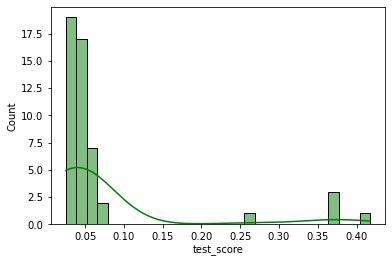

In [53]:
import seaborn as sns
plt.plot(figsize=(12,8))
sns.histplot(data=df_scores["test_score"], kde=True, color="green")


# Test

Let's do the same process with `df_test`.

In [11]:
#check data
df_test.head()

,carat,cut,color,clarity,depth,x,y,z
0,0.51,4,1,2,58.3,5.19,5.20,3.04
1,1.02,4,3,2,63.0,6.37,6.43,4.03
2,0.59,3,2,4,61.9,5.39,5.34,3.32
3,0.90,4,2,4,62.3,6.14,6.18,3.84
4,2.01,5,7,5,60.2,8.23,8.16,4.93


In [12]:
#train model
lr.fit(X, y)

#predict y
test_pred = lr.predict(df_test)

#compute mean square error
mse_test_t = mse(y_test, y_pred_test)

In [13]:
#display DataFrame
test = pd.DataFrame({"id":df_test.index, "price":test_pred})

In [14]:
#check data
test.head()

,id,price
0,0,7.096240
1,1,8.287210
2,2,7.604308
3,3,8.355495
4,4,9.875326


In [15]:
#save csv
test.to_csv("output/LinearRegression.csv", index = False, header = True)